# Computer Price Prediction

## Data Loading

In [9]:
# Importing dataset via kaggle

!kaggle datasets download -d muhammetvarl/laptop-price

Dataset URL: https://www.kaggle.com/datasets/muhammetvarl/laptop-price
License(s): other
100%|███████████████████████████████████████| 28.0k/28.0k [00:00<00:00, 234kB/s]
100%|███████████████████████████████████████| 28.0k/28.0k [00:00<00:00, 234kB/s]


In [10]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Computer Price Prediction About Dataset/laptop-price.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Computer Price Prediction About Dataset')

# Exploratory Data Analysis

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('laptop_price.csv', encoding='ISO-8859-1')

In [83]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [84]:
df.shape

(1303, 13)

In [85]:
df.size

16939

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [87]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [90]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [91]:
df['Product'].value_counts()

Product
XPS 13                                   30
Inspiron 3567                            29
250 G6                                   21
Vostro 3568                              19
Legion Y520-15IKBN                       19
                                         ..
ThinkPad L460                             1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No     1
Rog GL502VS                               1
Rog GL553VE-FY052T                        1
17-ak001nv (A6-9220/4GB/500GB/Radeon      1
Name: count, Length: 618, dtype: int64

## Data Visualization

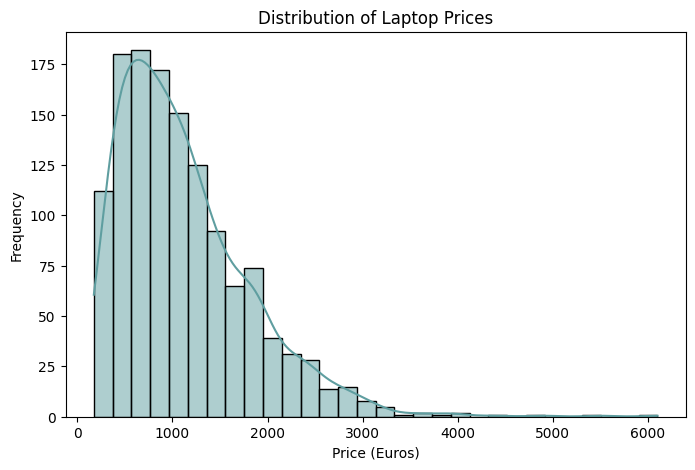

In [92]:
# Distribution of Laptop Prices

plt.figure(figsize=(8, 5))
sns.histplot(df["Price_euros"], bins=30, kde=True, color='cadetblue')
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price (Euros)")
plt.ylabel("Frequency")
plt.show()

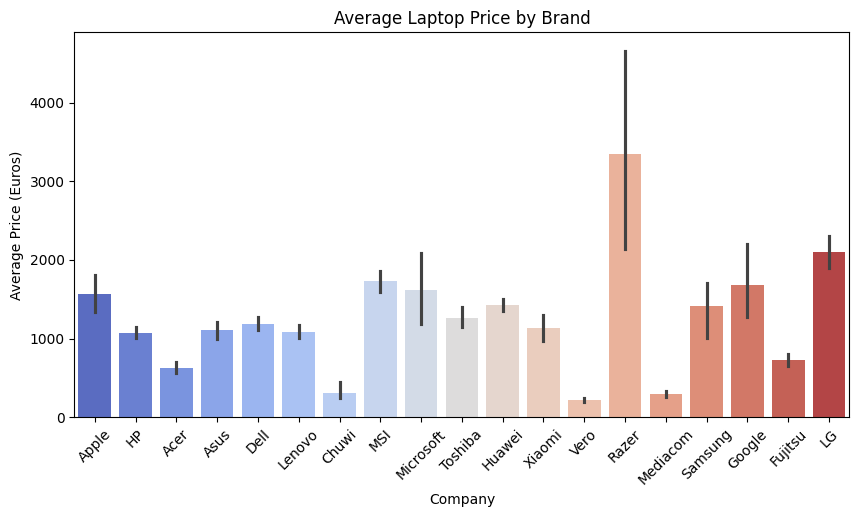

In [93]:
# Laptop Brands vs. Average Price

plt.figure(figsize=(10, 5))
sns.barplot(x=df["Company"], y=df["Price_euros"], estimator=lambda x: x.mean(), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Average Laptop Price by Brand")
plt.xlabel("Company")
plt.ylabel("Average Price (Euros)")
plt.show()

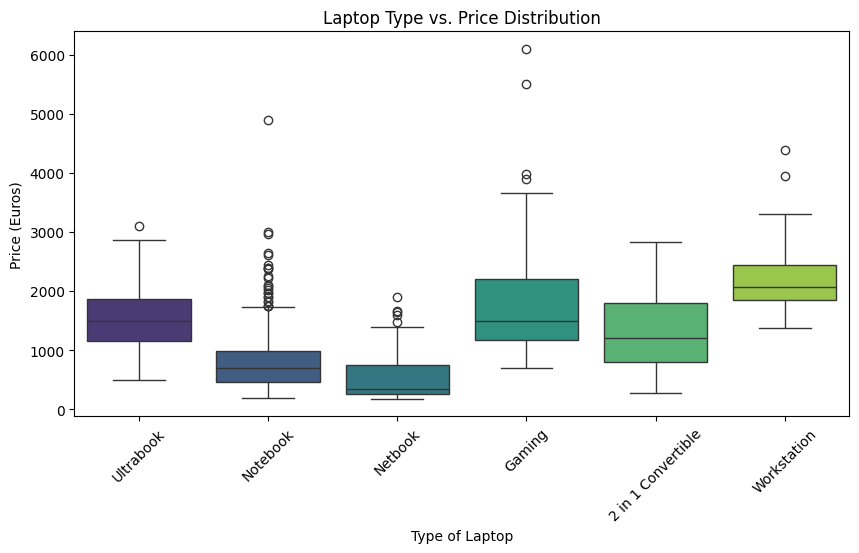

In [94]:
#Type of Laptop vs. Price

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["TypeName"], y=df["Price_euros"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Laptop Type vs. Price Distribution")
plt.xlabel("Type of Laptop")
plt.ylabel("Price (Euros)")
plt.show()

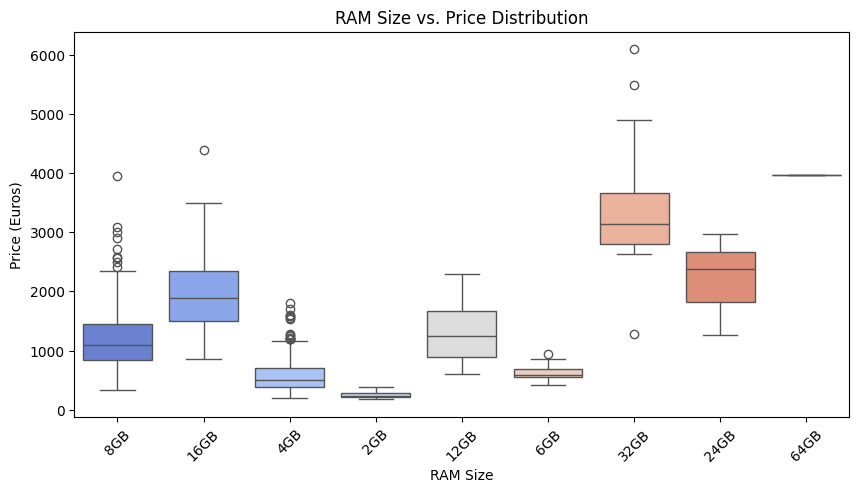

In [95]:
# RAM Size vs. Laptop Price

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Ram"], y=df["Price_euros"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("RAM Size vs. Price Distribution")
plt.xlabel("RAM Size")
plt.ylabel("Price (Euros)")
plt.show()

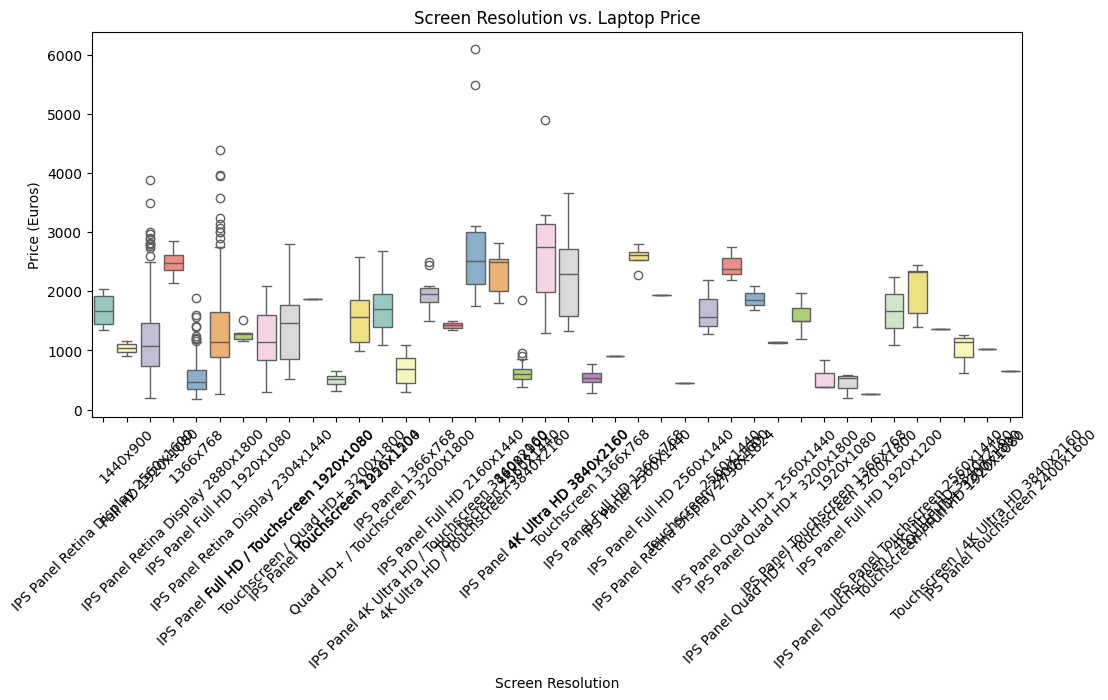

In [96]:
# Screen Resolution vs. Price

plt.figure(figsize=(12, 5))
sns.boxplot(x=df["ScreenResolution"], y=df["Price_euros"], palette="Set3")
plt.xticks(rotation=45)
plt.title("Screen Resolution vs. Laptop Price")
plt.xlabel("Screen Resolution")
plt.ylabel("Price (Euros)")
plt.show()

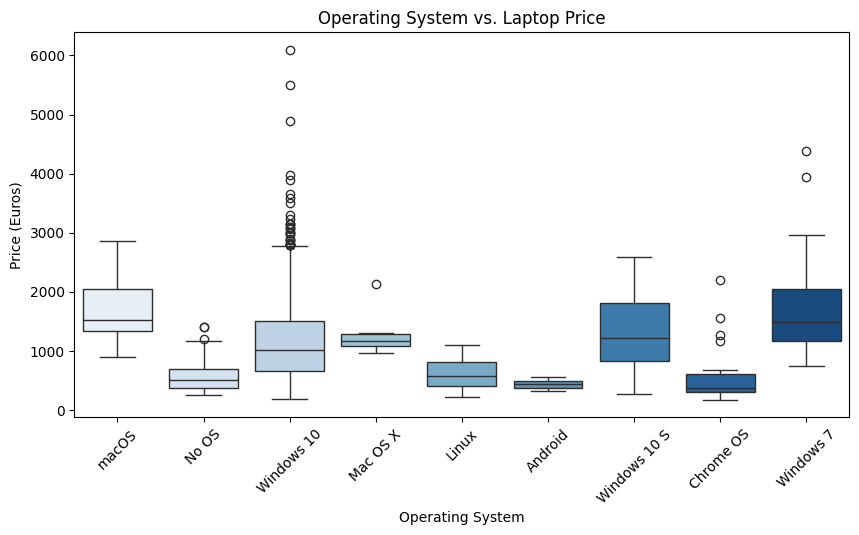

In [97]:
# Operating System vs. Price

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["OpSys"], y=df["Price_euros"], palette="Blues")
plt.xticks(rotation=45)
plt.title("Operating System vs. Laptop Price")
plt.xlabel("Operating System")
plt.ylabel("Price (Euros)")
plt.show()

## Data Preprocessing

In [98]:
# Dropping uwanted columns

df.drop('laptop_ID', axis=1, inplace=True)

In [ ]:
# Removing outliers using IQR method

def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns  
    Q1 = df[numeric_cols].quantile(0.25) 
    Q3 = df[numeric_cols].quantile(0.75)  
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
    
    return df

df = remove_outliers_iqr(df)

In [100]:
# Data Cleaning

df["Ram"] = df["Ram"].str.extract(r"(\d+)").astype(int)
df["Weight"] = df["Weight"].str.extract(r"(\d+\.\d+)").astype(float)

In [101]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [102]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [103]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [104]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [105]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

## Model Evaluation

In [106]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

performance = []

for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  

    performance.append([model.__class__.__name__, r2, mae, mse, rmse])

performance_df = pd.DataFrame(performance, columns=["Model", "R² Score", "MAE", "MSE", "RMSE"])

print(performance_df)

                       Model  R² Score         MAE           MSE        RMSE
0                      Ridge  0.696755   89.320032  12821.122592  113.230396
1               XGBRegressor  0.911655   43.342632   3735.216064   61.116414
2      RandomForestRegressor  0.887681   49.434077   4748.819853   68.911682
3          AdaBoostRegressor  0.759348   85.079303  10174.696513  100.869701
4  GradientBoostingRegressor  0.888949   52.856992   4695.222454   68.521693
5           BaggingRegressor  0.893998   48.678623   4481.748973   66.945866
6      DecisionTreeRegressor  0.761946   69.643725  10064.850202  100.323727
7                        SVR  0.061182  170.428704  39692.951710  199.230900
8        KNeighborsRegressor  0.785236   70.149798   9080.152713   95.289835
